In [26]:
#
# This notebook is written in a way intended to be view
# with cell inputs hidden. If this comment is visible,
# the data is at the end of the report, you may just ignore
# all the code.
#
# intended usage: convert to html with cell execution enabled
# > jupyter nbconvert --to=html --no-input --ExecutePreprocessor.enabled=True TM-status-report.ipynb
#
# if working in the gis repository, run:
# > make
# to automatically run, convert, and publish of github pages


# Tasking Manager COVID-19 Projects Summary


This is a Jupyter notebook for quickly summarizing the status of a HOTOSM Tasking Manager campaing using the TM API.
Data show here is periodically updated by and automated bot.


In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.core.display import display, HTML
# make sure pandas doesn't truncate the dataframe when rendered
pd.set_option('display.max_rows', 500)

import tasking_manager_client as tm

            
# set the text search keyword
textSearch = 'covid'
projectStatuses = 'ARCHIVED'
instance = 'tasks.hotosm.org'

# for notebooks used for reporting, it's nice to
# timestamp of the data, since it can get old quickly
now = datetime.utcnow()
print(f'data last updated: {now} UTC')
print(f'tasking manager:   {instance}')
print(f'search keyword:    {textSearch}')

data last updated: 2020-04-26 11:53:07.406116 UTC
tasking manager:   tasks.hotosm.org
search keyword:    covid


In [4]:

# concatenate paginated API results into one dataframe
result = pd.concat(tm.v1.project_search(textSearch=textSearch, projectStatuses=projectStatuses), ignore_index=True);
# search API pagination sometimes returns the same project more than once
result = result.drop_duplicates(subset='projectId');


## Current Published and Archived Projects

Published projects: 71
Archived projects:  15
Total projects:     86


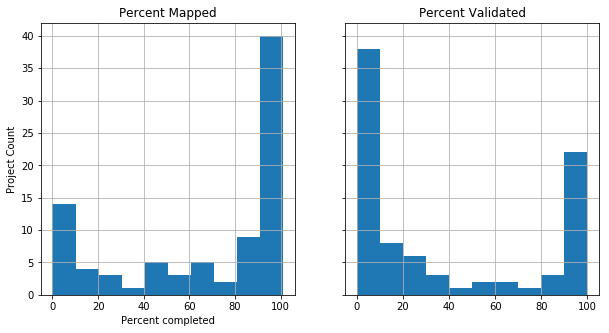

In [64]:

# Total count of projects
print('Published projects:', len(result[result.status == 'PUBLISHED']))
print('Archived projects: ', len(result[result.status == 'ARCHIVED']))
print('Total projects:    ', len(result))

fig, axs = plt.subplots(1,2, sharey=True, figsize=(10,5))
ax = axs[0]
ax.set_ylabel('Project Count')
ax.set_xlabel('Percent completed')
ax.hist(result.percentMapped)
ax.set_title('Percent Mapped')
ax.grid()
ax = axs[1]
ax.grid()
ax.set_title('Percent Validated')
ax.hist(result.percentValidated)
plt.show()



The table below shows the current status of all published and archived projects that include the `covid` keyword.

Projects are sorted by project id, meaning they are in somewhat choronological order.

You can click the project Id to open it in TM.

In [7]:

# We select only the most interesting fields from the dataframe
relevant = result[['projectId','name','percentMapped', 'percentValidated','priority','status']]

sorted_vals = relevant.sort_values('projectId')
sorted_vals['hyperlink'] = sorted_vals['projectId'].apply(tm.style.format_project_link)
sorted_vals.to_csv('TM-status-report.csv', index=False)
del sorted_vals['hyperlink']

# apply custom styler functions to final table
styled = sorted_vals.style\
    .background_gradient(cmap=tm.style.hotosm_cmap(),subset=['percentMapped', 'percentValidated'])\
    .applymap(tm.style.format_priority, subset=['priority'])\
    .applymap(tm.style.format_status, subset=['status'])\
    .format({'projectId': tm.style.format_clickable_project_id})


display(styled)

,projectId,name,percentMapped,percentValidated,priority,status
85,5909,"COVID-19, Quehue, Anna, Cusco Peru",98,39,LOW,PUBLISHED
84,7372,"COVID-19 - Paucartambo 1, Cusco, Peru",99,38,LOW,PUBLISHED
83,7379,"COVID-19 Yaurisque District, Cusco - Peru",100,100,LOW,ARCHIVED
82,7719,"COVID-19 - Chinchero - Urubamba, Peru",99,100,LOW,ARCHIVED
81,7720,"COVID-19 - Yucay, Cusco, Peru",90,90,LOW,ARCHIVED
80,7721,"COVID-19 - Coya - Calca, Peru",98,98,LOW,ARCHIVED
79,7768,"COVID-19 - Chamaca - Chumbivilcas, Peru",96,99,LOW,PUBLISHED
78,7769,"COVID-19 - Saylla - Cusco , Peru",95,100,LOW,ARCHIVED
77,7770,"COVID-19 San Jeronimo - Cusco , Peru",96,63,LOW,PUBLISHED
76,7968,"COVID-19 - Andahuaylillas - Quispicanchi, Peru",87,97,LOW,PUBLISHED


Notebook maintained by @jarmokivekas (hotosm slack), feedback and development ideas welcome.